In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import os

In [3]:
import pandas as pd
from pathlib import Path

# ---------- CONFIG ----------
BASE = "https://raw.githubusercontent.com/DieckmannDaniel/Git_energy_model/refs/heads/main/model_output"

# known files and separators
FILES = {
    "cost_breakdown.csv": "\t",
    "end_use.csv": "\t",
    "energy_output.csv": "\t",
    "gwp_breakdown.csv": "\t",
    "installed_technologies.csv": "\t",
    "losses.csv": "\t",
    "monthly_operation.csv": "\t",
    "performance.csv": "\t",
    "shares.csv": "\t",
    "storage.csv": "\t",
    "sankey/input2sankey.csv": ",",  # comma-separated, subfolder
}

def download_run_data(run_name: str, base: str = BASE) -> dict:
    """
    Downloads all model CSVs for a given run name into pandas DataFrames.
    Returns a dict like:
    {
        'TOTEX_min_baseline_cost_breakdown': DataFrame,
        'TOTEX_min_baseline_end_use': DataFrame,
        ...
    }
    """
    dfs = {}
    for rel_path, sep in FILES.items():
        url = f"{base.rstrip('/')}/{run_name}/{rel_path}"
        key = f"{run_name}_{Path(rel_path).stem}"  # e.g. TOTEX_min_baseline_cost_breakdown
        try:
            df = pd.read_csv(url, sep=sep, header=0)
            dfs[key] = df
            print(f"✅ Loaded: {key}")
        except Exception as e:
            print(f"[WARN] Could not load {url}: {e}")
    return dfs


In [4]:
if __name__ == "__main__":
    runs = ["TOTEX_min_baseline", "GWP_min_baseline_results"]

    all_data = {}
    for run in runs:
        all_data.update(download_run_data(run))

    # Example access:
    TOTEX_min_baseline_cost_breakdown = all_data["TOTEX_min_baseline_cost_breakdown"]
    display(TOTEX_min_baseline_cost_breakdown.head())

✅ Loaded: TOTEX_min_baseline_cost_breakdown
✅ Loaded: TOTEX_min_baseline_end_use
✅ Loaded: TOTEX_min_baseline_energy_output
✅ Loaded: TOTEX_min_baseline_gwp_breakdown
✅ Loaded: TOTEX_min_baseline_installed_technologies
✅ Loaded: TOTEX_min_baseline_losses
✅ Loaded: TOTEX_min_baseline_monthly_operation
✅ Loaded: TOTEX_min_baseline_performance
✅ Loaded: TOTEX_min_baseline_shares
✅ Loaded: TOTEX_min_baseline_storage
✅ Loaded: TOTEX_min_baseline_input2sankey
✅ Loaded: GWP_min_baseline_results_cost_breakdown
✅ Loaded: GWP_min_baseline_results_end_use
✅ Loaded: GWP_min_baseline_results_energy_output
✅ Loaded: GWP_min_baseline_results_gwp_breakdown
✅ Loaded: GWP_min_baseline_results_installed_technologies
✅ Loaded: GWP_min_baseline_results_losses
✅ Loaded: GWP_min_baseline_results_monthly_operation
✅ Loaded: GWP_min_baseline_results_performance
✅ Loaded: GWP_min_baseline_results_shares
✅ Loaded: GWP_min_baseline_results_storage
✅ Loaded: GWP_min_baseline_results_input2sankey


,Technology,C_inv [MCHF/y],C_maint [MCHF/y]
0,CCGT,88.985174,38.744015
1,PV,299.577580,250.771200
2,WIND,743.561476,169.460000
3,HYDRO_DAM,1905.444566,35.780227
4,HYDRO_RIVER,1140.409501,328.295917


In [5]:
all_data.keys()


dict_keys(['TOTEX_min_baseline_cost_breakdown', 'TOTEX_min_baseline_end_use', 'TOTEX_min_baseline_energy_output', 'TOTEX_min_baseline_gwp_breakdown', 'TOTEX_min_baseline_installed_technologies', 'TOTEX_min_baseline_losses', 'TOTEX_min_baseline_monthly_operation', 'TOTEX_min_baseline_performance', 'TOTEX_min_baseline_shares', 'TOTEX_min_baseline_storage', 'TOTEX_min_baseline_input2sankey', 'GWP_min_baseline_results_cost_breakdown', 'GWP_min_baseline_results_end_use', 'GWP_min_baseline_results_energy_output', 'GWP_min_baseline_results_gwp_breakdown', 'GWP_min_baseline_results_installed_technologies', 'GWP_min_baseline_results_losses', 'GWP_min_baseline_results_monthly_operation', 'GWP_min_baseline_results_performance', 'GWP_min_baseline_results_shares', 'GWP_min_baseline_results_storage', 'GWP_min_baseline_results_input2sankey'])

                          CAPEX [MCHF/y]  OPEX [MCHF/y]  TOTEX [MCHF/y]  \
Model                                                                     
TOTEX_min_baseline              10663.18        5248.96        15912.14   
GWP_min_baseline_results        17026.55        7768.27        24794.81   

                          GWP_construction [ktCO2e/y]  GWP_op [ktCO2e/y]  \
Model                                                                      
TOTEX_min_baseline                            1768.57           40739.01   
GWP_min_baseline_results                      2049.20            9134.35   

                          GWP_total [ktCO2e/y]  
Model                                           
TOTEX_min_baseline                    42507.58  
GWP_min_baseline_results              11183.56  


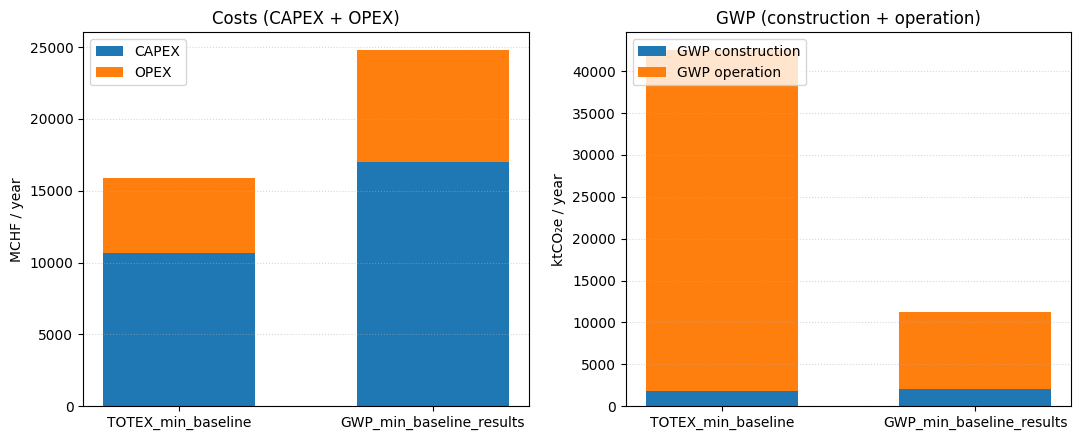

,CAPEX [MCHF/y],OPEX [MCHF/y],TOTEX [MCHF/y],GWP_construction [ktCO2e/y],GWP_op [ktCO2e/y],GWP_total [ktCO2e/y]
Model,,,,,,
TOTEX_min_baseline,10663.18,5248.96,15912.14,1768.57,40739.01,42507.58
GWP_min_baseline_results,17026.55,7768.27,24794.81,2049.20,9134.35,11183.56


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# === pick which performance DFs (keys in all_data) to compare ===
MODELS = [
    "TOTEX_min_baseline_performance",
    "GWP_min_baseline_results_performance",
]
# =================================================================

def grab_metrics(df: pd.DataFrame) -> dict:
    """Return CAPEX/OPEX/TOTEX and GWP parts from a performance table."""
    # find indicator column, drop any repeated header rows
    ind = next((c for c in df.columns if "indicator" in c.lower()), df.columns[0])
    clean = df[df[ind].astype(str).str.lower() != "indicator"].copy()

    # pick the first non-indicator column that has numbers
    val_cols = [c for c in df.columns if c != ind]
    def get(indicator, default=0.0):
        rows = clean[clean[ind].astype(str).str.strip() == indicator]
        if rows.empty: return default
        for c in val_cols:
            s = pd.to_numeric(rows[c], errors="coerce")
            if s.notna().any():
                return float(s.dropna().iloc[0])
        return default

    return {
        "CAPEX [MCHF/y]":                 get("CAPEX"),
        "OPEX [MCHF/y]":                  get("OPEX"),
        "TOTEX [MCHF/y]":                 get("TOTEX"),
        "GWP_construction [ktCO2e/y]":   get("GWP_construction"),
        "GWP_op [ktCO2e/y]":             get("GWP_op"),
        "GWP_total [ktCO2e/y]":          get("GWP_total"),
    }

# ---------- retrieve & summarize ----------
rows = []
for key in MODELS:
    df = all_data[key]  # expects you already filled all_data[key] with each performance DataFrame
    label = key[:-12] if key.endswith("_performance") else key
    m = grab_metrics(df)
    m["Model"] = label
    rows.append(m)

summary = pd.DataFrame(rows).set_index("Model")
print(summary)  # optional: see the numbers

# ---------- visualize ----------
model_names = summary.index.tolist()
x = range(len(model_names))
bar_w = 0.6

fig, (ax_cost, ax_gwp) = plt.subplots(1, 2, figsize=(11, 4.5))

# Costs: CAPEX + OPEX
capex = summary["CAPEX [MCHF/y]"].astype(float).values
opex  = summary["OPEX [MCHF/y]"].astype(float).values
b1 = ax_cost.bar(x, capex, width=bar_w)
b2 = ax_cost.bar(x, opex,  width=bar_w, bottom=capex)
ax_cost.set_xticks(list(x)); ax_cost.set_xticklabels(model_names)
ax_cost.set_title("Costs (CAPEX + OPEX)"); ax_cost.set_ylabel("MCHF / year")
ax_cost.legend([b1, b2], ["CAPEX", "OPEX"], loc="upper left")
ax_cost.grid(axis="y", linestyle=":", alpha=0.5)

# GWP: construction + operation
gwp_c = summary["GWP_construction [ktCO2e/y]"].astype(float).values
gwp_o = summary["GWP_op [ktCO2e/y]"].astype(float).values
g1 = ax_gwp.bar(x, gwp_c, width=bar_w)
g2 = ax_gwp.bar(x, gwp_o, width=bar_w, bottom=gwp_c)
ax_gwp.set_xticks(list(x)); ax_gwp.set_xticklabels(model_names)
ax_gwp.set_title("GWP (construction + operation)"); ax_gwp.set_ylabel("ktCO₂e / year")
ax_gwp.legend([g1, g2], ["GWP construction", "GWP operation"], loc="upper left")
ax_gwp.grid(axis="y", linestyle=":", alpha=0.5)

plt.tight_layout()
plt.show()

# optional: keep the summary in the notebook output
summary


# Functions

## CAPEX/GWP Comparison

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Iterable, Optional, Tuple

def compare_performance(
    all_data: Dict[str, pd.DataFrame],
    models: Optional[Iterable[str]] = None,
    figsize: Tuple[float, float] = (11, 4.5),
    show: bool = True,
    return_summary: bool = True,
):
    """
    Build a summary table of CAPEX/OPEX/TOTEX and GWP, and plot two stacked bar charts:
    (1) Costs (CAPEX + OPEX) and (2) GWP (construction + operation).

    Parameters
    ----------
    all_data : dict[str, pd.DataFrame]
        Mapping of model-key -> performance DataFrame.
        Each performance DataFrame should contain an "indicator" column (case-insensitive)
        and numeric columns for CAPEX/OPEX/TOTEX/GWP_*.
    models : iterable[str] or None
        Keys in `all_data` to compare. If None, compares all keys in insertion order.
    figsize : (w, h)
        Size of the matplotlib figure.
    show : bool
        If True, calls plt.show().
    return_summary : bool
        If True, returns the summary DataFrame along with (fig, axes).

    Returns
    -------
    (fig, (ax_cost, ax_gwp)) or (fig, (ax_cost, ax_gwp), summary_df)
    """
    # --- helpers ---
    def grab_metrics(df: pd.DataFrame) -> dict:
        """Return CAPEX/OPEX/TOTEX and GWP parts from a performance table."""
        # find indicator column, drop any repeated header rows
        ind = next((c for c in df.columns if "indicator" in c.lower()), df.columns[0])
        clean = df[df[ind].astype(str).str.lower() != "indicator"].copy()

        # pick the first non-indicator column that has numbers
        val_cols = [c for c in df.columns if c != ind]

        def get(indicator, default=0.0):
            rows = clean[clean[ind].astype(str).str.strip() == indicator]
            if rows.empty:
                return default
            for c in val_cols:
                s = pd.to_numeric(rows[c], errors="coerce")
                if s.notna().any():
                    return float(s.dropna().iloc[0])
            return default

        return {
            "CAPEX [MCHF/y]":               get("CAPEX"),
            "OPEX [MCHF/y]":                get("OPEX"),
            "TOTEX [MCHF/y]":               get("TOTEX"),
            "GWP_construction [ktCO2e/y]":  get("GWP_construction"),
            "GWP_op [ktCO2e/y]":            get("GWP_op"),
            "GWP_total [ktCO2e/y]":         get("GWP_total"),
        }

    # --- select models to use ---
    if models is None:
        models = list(all_data.keys())
    else:
        models = list(models)

    # --- retrieve & summarize ---
    rows = []
    labels = []
    for key in models:
        df = all_data[key]
        # label: strip trailing "_performance" if present
        label = key[:-12] if key.endswith("_performance") else key
        labels.append(label)
        m = grab_metrics(df)
        m["Model"] = label
        rows.append(m)

    summary = pd.DataFrame(rows).set_index("Model")

    # --- visualize ---
    model_names = summary.index.tolist()
    x = range(len(model_names))
    bar_w = 0.6

    fig, (ax_cost, ax_gwp) = plt.subplots(1, 2, figsize=figsize)

    # Costs: CAPEX + OPEX
    capex = summary["CAPEX [MCHF/y]"].astype(float).values
    opex  = summary["OPEX [MCHF/y]"].astype(float).values
    b1 = ax_cost.bar(x, capex, width=bar_w)
    b2 = ax_cost.bar(x, opex,  width=bar_w, bottom=capex)
    ax_cost.set_xticks(list(x))
    ax_cost.set_xticklabels(model_names, rotation=0)
    ax_cost.set_title("Costs (CAPEX + OPEX)")
    ax_cost.set_ylabel("MCHF / year")
    ax_cost.legend([b1, b2], ["CAPEX", "OPEX"], loc="upper left")
    ax_cost.grid(axis="y", linestyle=":", alpha=0.5)

    # GWP: construction + operation
    gwp_c = summary["GWP_construction [ktCO2e/y]"].astype(float).values
    gwp_o = summary["GWP_op [ktCO2e/y]"].astype(float).values
    g1 = ax_gwp.bar(x, gwp_c, width=bar_w)
    g2 = ax_gwp.bar(x, gwp_o, width=bar_w, bottom=gwp_c)
    ax_gwp.set_xticks(list(x))
    ax_gwp.set_xticklabels(model_names, rotation=0)
    ax_gwp.set_title("GWP (construction + operation)")
    ax_gwp.set_ylabel("ktCO₂e / year")
    ax_gwp.legend([g1, g2], ["GWP construction", "GWP operation"], loc="upper left")
    ax_gwp.grid(axis="y", linestyle=":", alpha=0.5)

    plt.tight_layout()
    if show:
        plt.show()

    return (fig, (ax_cost, ax_gwp), summary) if return_summary else (fig, (ax_cost, ax_gwp))


## Create Table of Installed Capacities

In [ ]:
import pandas as pd
from pathlib import Path
import os


def compare_installed_technologies(model_1: str, model_2: str, cap_col: str = "Installed capacity [GW]"):
    """
    Compare installed technologies between two model outputs.

    Parameters
    ----------
    model_1 : str
        Name of the first model (folder under ../model_output/).
    model_2 : str
        Name of the second model (folder under ../model_output/).
    cap_col : str, optional
        Column name for installed capacity (default: "Installed capacity [GW]").

    Returns
    -------
    merged : pandas.DataFrame
        DataFrame with installed capacities for both models, aligned by technology
        and ordered by a predefined list of technologies.
    """

    # -----------------------------
    # 1) Define paths
    # -----------------------------
    f1 = Path(f"../model_output/{model_1}/installed_technologies.csv")
    f2 = Path(f"../model_output/{model_2}/installed_technologies.csv")

    if not f1.exists():
        raise FileNotFoundError(f"Missing file: {f1}")
    if not f2.exists():
        raise FileNotFoundError(f"Missing file: {f2}")

    # -----------------------------
    # 2) Define technology order
    # -----------------------------
    tech_order = [
        "IND_BOILER_GAS", "IND_BOILER_OIL", "IND_HEATER_ELEC", "DEC_BOILER_GAS", "DEC_BOILER_OIL",
        "DEC_HEATER_ELEC", "CAR_GASOLINE", "CAR_DIESEL", "CAR_NG", "CAR_PHEV", "CAR_BEV", "CAR_FC",
        "BUS_DIESEL", "BUS_NG", "BUS_FC", "TRAIN_PUBLIC", "TRAIN_FREIGHT",
        "TRUCK_FREIGHT_DIESEL", "TRUCK_FREIGHT_FC", "CCGT", "CCGT_CCS", "COAL_COMBUSTION",
        "COAL_IGCC", "COAL_COMBUSTION_CCS", "COAL_IGCC_CCS", "IND_BOILER_COAL", "NUCLEAR",
        "IND_COGEN_GAS", "DEC_COGEN_GAS", "DEC_COGEN_OIL", "DHN_COGEN_GAS", "DHN_BOILER_GAS",
        "DHN_BOILER_OIL", "DEC_HP_ELEC", "DHN_HP_ELEC", "DEC_THERMAL_HP_GAS", "GEOTHERMAL_ELEC",
        "DHN_GEOTHERMAL", "HYDRO_DAM", "HYDRO_RIVER", "WIND", "PV", "THERMAL_SOLAR",
        "IND_BOILER_WOOD", "IND_BOILER_WASTE", "IND_COGEN_WOOD", "IND_COGEN_WASTE",
        "DHN_BOILER_WOOD", "DEC_BOILER_WOOD", "DHN_COGEN_WOOD", "DHN_COGEN_WASTE",
        "GASIFICATION_SNG", "PYROLYSIS", "DEC_COGEN_H2", "H2_ELECTROLYSIS", "H2_FROM_GAS",
        "H2_FROM_BIOMASS", "P2G_STORAGE", "P2G_INVESTMENT", "POWER_TO_GAS_EFF", "GAS_TO_POWER_EFF"
    ]

    # -----------------------------
    # 3) Read CSVs
    # -----------------------------
    a = pd.read_csv(f1, sep="\t")
    b = pd.read_csv(f2, sep="\t")

    # -----------------------------
    # 4) Select and rename columns
    # -----------------------------
    model1_name = os.path.basename(os.path.dirname(f1))
    model2_name = os.path.basename(os.path.dirname(f2))

    a_sel = a[["Technology", cap_col]].rename(columns={cap_col: model1_name})
    b_sel = b[["Technology", cap_col]].rename(columns={cap_col: model2_name})

    # -----------------------------
    # 5) Merge
    # -----------------------------
    merged = pd.merge(a_sel, b_sel, on="Technology", how="outer")

    # -----------------------------
    # 6) Reorder by tech_order
    # -----------------------------
    merged = merged.set_index("Technology").reindex(tech_order).reset_index()

    # -----------------------------
    # 7) Drop empty rows
    # -----------------------------
    merged = merged.dropna(subset=[model1_name, model2_name], how="all")

    # -----------------------------
    # 8) Rename and return
    # -----------------------------
    merged = merged.rename(columns={"Technology": "Technology"})

    return merged

## Make Sankey

In [88]:
# sankey_from_csv.py
# Function version: create an interactive Sankey diagram given a model name.

from pathlib import Path
import pandas as pd
import plotly.graph_objects as go


def make_sankey(model_name: str):
    """
    Create and display an interactive Sankey diagram from:
      ../model_output/{model_name}/sankey/input2sankey.csv

    Parameters
    ----------
    model_name : str
        Name of the model/run folder to load the CSV from.

    Returns
    -------
    fig : plotly.graph_objects.Figure
        The Sankey diagram figure.
    """

    # -----------------------------
    # 1) Load CSV
    # -----------------------------
    csv_path = Path(f"../model_output/{model_name}/sankey/input2sankey.csv")
    if not csv_path.exists():
        raise FileNotFoundError(f"CSV not found at: {csv_path}")

    df = pd.read_csv(csv_path)

    # -----------------------------
    # 2) Detect columns
    # -----------------------------
    possible_sources = ["source", "from", "src", "origin", "start", "left"]
    possible_targets = ["target", "to", "dst", "destination", "end", "right"]
    possible_values = ["value", "weight", "amount", "count", "size", "flow", "volume"]

    def find_col(possible, columns):
        lower_map = {c.lower(): c for c in columns}
        for name in possible:
            if name in lower_map:
                return lower_map[name]
        # fuzzy match
        for c in columns:
            if any(name in c.lower() for name in possible):
                return c
        return None

    src_col = find_col(possible_sources, df.columns)
    tgt_col = find_col(possible_targets, df.columns)
    val_col = find_col(possible_values, df.columns)

    # Melt if pivoted
    if src_col and (not tgt_col) and df.shape[1] > 2:
        value_cols = [c for c in df.columns if c != src_col]
        melted = df.melt(
            id_vars=[src_col],
            value_vars=value_cols,
            var_name="__target__",
            value_name="__value__"
        )
        melted = melted[melted["__value__"].notna() & (melted["__value__"] != 0)]
        data = melted.rename(columns={src_col: "source", "__target__": "target", "__value__": "value"})
    else:
        # Edge list fallback
        if not src_col or not tgt_col:
            cols = list(df.columns)
            if len(cols) < 2:
                raise ValueError("Need at least two columns for source and target.")
            src_col = src_col or cols[0]
            tgt_col = tgt_col or cols[1]
            if len(cols) >= 3 and val_col is None:
                val_col = cols[2]
        if val_col is None or val_col not in df.columns:
            df["__value__"] = 1
            val_col = "__value__"
        data = df.rename(columns={src_col: "source", tgt_col: "target", val_col: "value"})

    # Clean up
    data = data[["source", "target", "value"]].copy()
    data["value"] = pd.to_numeric(data["value"], errors="coerce").fillna(1)
    data = data[data["value"] > 0]

    if data.empty:
        raise ValueError("No valid (positive) flows found after processing your CSV.")

    # -----------------------------
    # 3) Build node index mapping
    # -----------------------------
    all_nodes = pd.Index(data["source"]).append(pd.Index(data["target"])).unique().tolist()
    node_index = {name: i for i, name in enumerate(all_nodes)}
    data["src_idx"] = data["source"].map(node_index)
    data["tgt_idx"] = data["target"].map(node_index)

    # -----------------------------
    # 4) Create the Sankey diagram
    # -----------------------------
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(width=0.5),
            label=all_nodes,
        ),
        link=dict(
            source=data["src_idx"].tolist(),
            target=data["tgt_idx"].tolist(),
            value=data["value"].tolist(),
            label=[f"{s} → {t}" for s, t in zip(data["source"], data["target"])],
        )
    )])

    fig.update_layout(
        title_text=f"Sankey Diagram: {model_name}",
        font_size=12
    )

    #fig.show()
    return fig


# Execution of functions

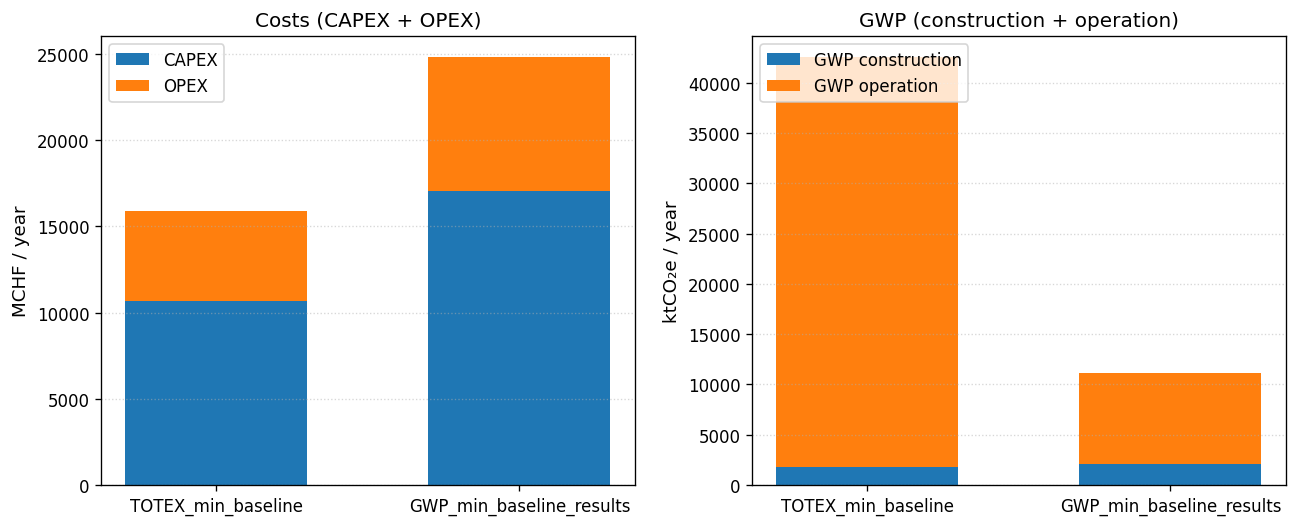

,CAPEX [MCHF/y],OPEX [MCHF/y],TOTEX [MCHF/y],GWP_construction [ktCO2e/y],GWP_op [ktCO2e/y],GWP_total [ktCO2e/y]
Model,,,,,,
TOTEX_min_baseline,10663.18,5248.96,15912.14,1768.57,40739.01,42507.58
GWP_min_baseline_results,17026.55,7768.27,24794.81,2049.20,9134.35,11183.56


In [105]:
# --- example usage ---
fig, (ax_cost, ax_gwp), summary = compare_performance(
     all_data,
     models=[
        "TOTEX_min_baseline_performance",
        "GWP_min_baseline_results_performance",
                  ],
 )
display(summary)

In [106]:
compare_installed_technologies("TOTEX_min_baseline", "GWP_min_baseline_results")

,Technology,TOTEX_min_baseline,GWP_min_baseline_results
0,IND_BOILER_GAS,1.063726,3.948264
2,IND_HEATER_ELEC,NaN,3.161050
3,DEC_BOILER_GAS,13.284044,3.597473
4,DEC_BOILER_OIL,1.967938,1.798737
5,DEC_HEATER_ELEC,NaN,0.489817
6,CAR_GASOLINE,1.184590,1.184590
7,CAR_DIESEL,1.184590,1.184590
8,CAR_NG,0.592295,0.592295
10,CAR_BEV,1.776884,1.776884
11,CAR_FC,1.184590,1.184590


In [89]:
make_sankey("TOTEX_min_baseline")

In [91]:
make_sankey("GWP_min_baseline_results") 